In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
try:
    goalscorers = pd.read_csv(r'C:\Users\idoya\OneDrive\Desktop\goalscorers.csv')
    results = pd.read_csv(r'C:\Users\idoya\OneDrive\Desktop\results.csv')
    shootouts = pd.read_csv(r'C:\Users\idoya\OneDrive\Desktop\shootouts.csv')   
except FileNotFoundError:
    goalscorers = pd.read_csv(r'/Users/edeneldar/Downloads/goalscorers.csv')
    results = pd.read_csv(r'/Users/edeneldar/Downloads/results.csv')
    shootouts = pd.read_csv(r'/Users/edeneldar/Downloads/shootouts.csv')

In [72]:
display(shootouts.head())

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [73]:
display(goalscorers.head())

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [5]:
display(results.head())

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [6]:
display(results.describe())

,home_score,away_score
count,47267.000000,47267.000000
mean,1.760827,1.183490
std,1.775940,1.402493
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


# Distribution of home and away team scores

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


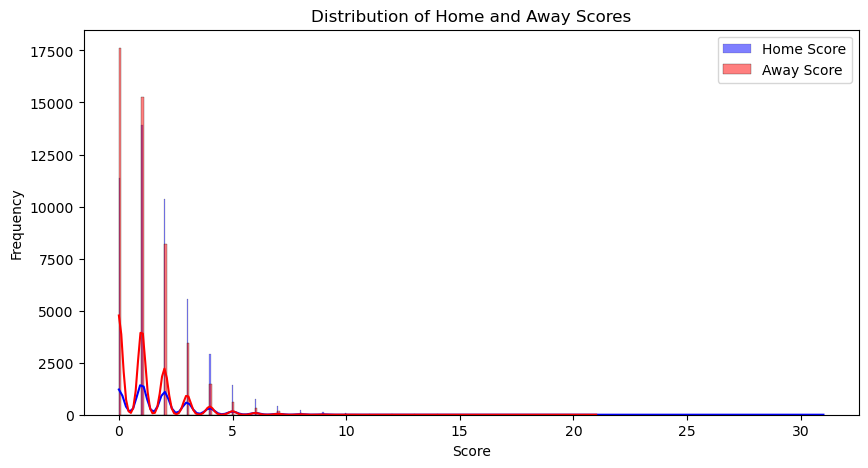

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(results['home_score'], kde=True, color='blue', label='Home Score')
sns.histplot(results['away_score'], kde=True, color='red', label='Away Score')
plt.title('Distribution of Home and Away Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Wins by Home and Away Teams

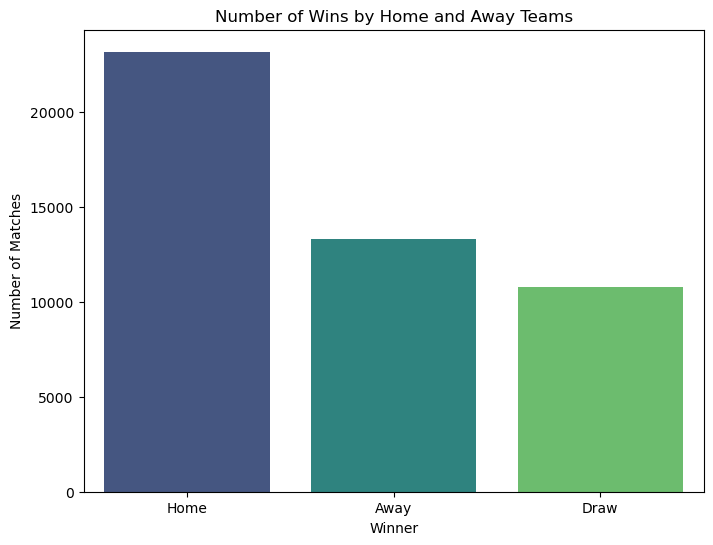

In [51]:
# Determine the winner
results['winner'] = results.apply(lambda row: 'Home' if row['home_score'] > row['away_score'] else ('Away' if row['home_score'] < row['away_score'] else 'Draw'), axis=1)

# Count of wins by home and away teams
win_counts = results['winner'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=win_counts.index, y=win_counts.values, palette='viridis')
plt.title('Number of Wins by Home and Away Teams')
plt.xlabel('Winner')
plt.ylabel('Number of Matches')
plt.show()


# Average Scores Over Time

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

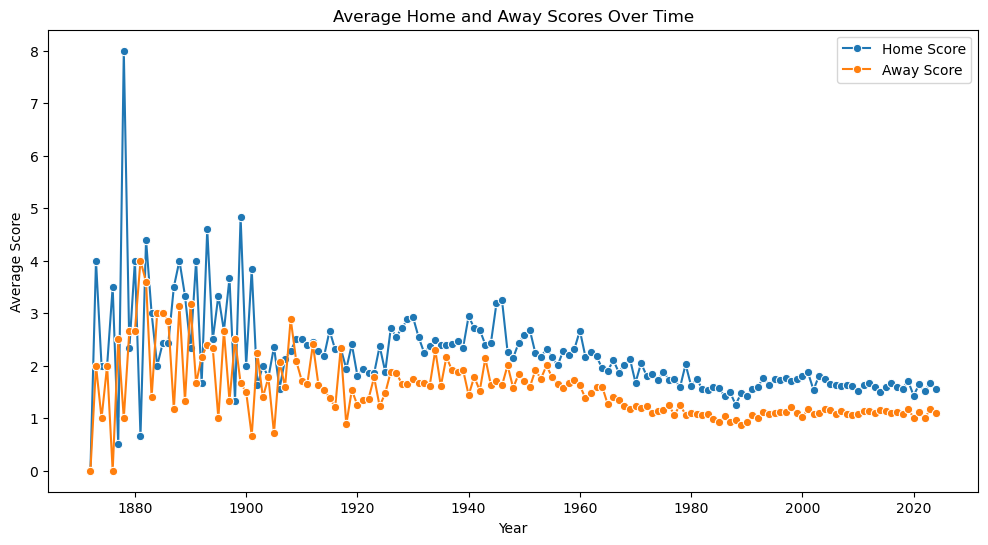

In [52]:
results['date'] = pd.to_datetime(results['date'])
results['year'] = results['date'].dt.year

avg_scores = results.groupby('year')[['home_score', 'away_score']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='home_score', data=avg_scores, label='Home Score', marker='o')
sns.lineplot(x='year', y='away_score', data=avg_scores, label='Away Score', marker='o')
plt.title('Average Home and Away Scores Over Time')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.legend()
plt.show()


# Determine if the home team won

In [53]:
def determine_winner(row):
    if row['home_score'] > row['away_score']:
        return True
    elif row['home_score'] < row['away_score']:
        return False
    else:
        shootout_winner = shootouts[(shootouts['date'] == row['date']) & 
                                    (shootouts['home_team'] == row['home_team']) & 
                                    (shootouts['away_team'] == row['away_team'])]['winner'].values
        return shootout_winner[0] == row['home_team'] if len(shootout_winner) > 0 else None

results['home_team_won'] = results.apply(determine_winner, axis=1)
results['away_team_won'] = [False if value is True else True if value is False else None for value in results['home_team_won']]


In [54]:
# Fill None values in home_team_won with False
results['home_team_won'].fillna(False, inplace=True)
results['away_team_won'].fillna(False, inplace=True)


In [55]:

# Function to calculate home and away win rates
def calculate_home_away_win_rate_avg(df):
    df = df.copy()
    df['home_team_win_rate'] = 0.0
    df['away_team_win_rate'] = 0.0
    home_wins = 0
    home_goals = 0
    away_wins = 0
    away_goals = 0
    total_games = 0
    total_goals = 0

    for i, row in df.iterrows():
        if row['home_team_won']:
            home_wins += 1
        elif row['away_team_won']:
            away_wins += 1
        else:
            home_wins += 0.5
            away_wins += 0.5

        home_goals += row['home_score']
        away_goals += row['away_score']
        total_games += 1
        total_goals += row['home_score'] + row['away_score']

        home_win_rate = home_wins / total_games
        away_win_rate = away_wins / total_games

        if total_goals == 0:
            home_goal_avg = 0
            away_goal_avg = 0
        else:
            if home_wins > 0:
                home_goal_avg = home_wins / total_goals
            else:
                home_goal_avg = 0

            if away_wins > 0:
                away_goal_avg = away_wins / total_goals
            else:
                away_goal_avg = 0


        df.at[i, 'home_team_avg_score'] = home_goal_avg
        df.at[i, 'away_team_avg_score'] = away_goal_avg

        df.at[i, 'home_team_win_rate'] = home_win_rate * 100  # Convert to percentage
        df.at[i, 'away_team_win_rate'] = away_win_rate * 100  # Convert to percentage

    return df



In [56]:

# Sort the results by date
results = results.sort_values('date')


# Calculate home vs away win rate
results = calculate_home_away_win_rate_avg(results)


In [13]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestClassifier
# from datetime import datetime


# # Ensure date columns are in datetime format and remove the time component
# results['date'] = pd.to_datetime(results['date']).dt.date
# shootouts['date'] = pd.to_datetime(shootouts['date'], dayfirst=True).dt.date

# # Function to determine match result
# def get_match_result(row):
#     home_team = row['home_team']
#     away_team = row['away_team']
#     home_goals = row['home_score']
#     away_goals = row['away_score']
#     Dategame = row['date']
    
#     if home_goals > away_goals:
#         row['Home_team_won'] = True
#         row['Away_team_won'] = False
#     elif home_goals < away_goals:
#         row['Home_team_won'] = False
#         row['Away_team_won'] = True
#     else:
#         specific_match = shootouts[(shootouts['date'] == Dategame) &
#                                    (shootouts['home_team'] == home_team) &
#                                    (shootouts['away_team'] == away_team)]
#         if not specific_match.empty:
#             if specific_match.iloc[0]['winner'] == home_team:
#                 row['Home_team_won'] = True
#                 row['Away_team_won'] = False
#             else:
#                 row['Home_team_won'] = False
#                 row['Away_team_won'] = True
#         else:
#             row['Home_team_won'] = False
#             row['Away_team_won'] = False

#     return row

# # Apply the function to each row
# results = results.apply(get_match_result, axis=1)

# # Debug: Check for missing values
# print("Missing values after applying get_match_result function:")
# print(results.isnull().sum())

# # Feature Engineering
# results['Total goals in match'] = results['home_score'] + results['away_score']
# results['Goal difference'] = abs(results['home_score'] - results['away_score'])

# # Function to calculate win rate and average goals
# def calculate_team_stats(team, date, home_away):
#     past_matches = results[(results['date'] < date) & ((results['home_team'] == team) | (results['away_team'] == team))]
#     if home_away == 'home':
#         past_matches = past_matches[past_matches['home_team'] == team]
#         win_rate = (past_matches['Home_team_won'] == 1).mean()
#         avg_goals = past_matches['home_score'].mean()
#     else:
#         past_matches = past_matches[past_matches['away_team'] == team]
#         win_rate = (past_matches['Home_team_won'] == 0).mean()
#         avg_goals = past_matches['away_score'].mean()
#     return win_rate, avg_goals

# # Calculate win rates and average goals
# results['Home team win rate'] = results.apply(lambda row: calculate_team_stats(row['home_team'], row['date'], 'home')[0], axis=1)
# results['Home team average goals'] = results.apply(lambda row: calculate_team_stats(row['home_team'], row['date'], 'home')[1], axis=1)
# results['Away team win rate'] = results.apply(lambda row: calculate_team_stats(row['away_team'], row['date'], 'away')[0], axis=1)
# results['Away team average goals'] = results.apply(lambda row: calculate_team_stats(row['away_team'], row['date'], 'away')[1], axis=1)

# # Additional features
# results['Day of the week'] = pd.to_datetime(results['date']).dt.day_name()
# results['Month of the year'] = pd.to_datetime(results['date']).dt.month

# # One-hot encode categorical features
# encoder = OneHotEncoder()
# encoded_features = encoder.fit_transform(results[['Day of the week', 'Month of the year']]).toarray()
# encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Day of the week', 'Month of the year']))

# # Concatenate encoded features with the results DataFrame
# results = pd.concat([results.reset_index(drop=True), encoded_df], axis=1)

# # Imputation (handle NaN values)
# imputer = SimpleImputer(strategy='mean')
# results[['Home team win rate', 'Away team win rate', 'Home team average goals', 'Away team average goals']] = imputer.fit_transform(results[['Home team win rate', 'Away team win rate', 'Home team average goals', 'Away team average goals']])

# # Transformation
# scaler = StandardScaler()
# results[['Home team win rate', 'Away team win rate', 'Home team average goals', 'Away team average goals', 'Total goals in match', 'Goal difference']] = scaler.fit_transform(results[['Home team win rate', 'Away team win rate', 'Home team average goals', 'Away team average goals', 'Total goals in match', 'Goal difference']])

# # Feature Selection
# # Calculate feature importance using Random Forest
# rf = RandomForestClassifier()
# X = results[['Home team win rate', 'Away team win rate', 'Home team average goals', 'Away team average goals', 'Total goals in match', 'Goal difference'] + list(encoded_df.columns)]
# y = results['Home_team_won']

# # Impute NaN values in X before fitting the model
# X = imputer.fit_transform(X)

# rf.fit(X, y)
# feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# # Select top features
# selected_features = feature_importance.head(10).index.tolist()  # Adjusted to select top 10 features

# # Final dataset
# final_data = results[selected_features + ['Home_team_won']]

# # Save the preprocessed data
# final_data.to_csv('preprocessed_results.csv', index=False)

# print("Preprocessing complete. Data saved to 'preprocessed_results.csv'")

/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_71507/4201953507.py:11: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  shootouts['date'] = pd.to_datetime(shootouts['date'], dayfirst=True).dt.date


KeyboardInterrupt: 

In [27]:
display(results.head())

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,year,home_team_won,away_team_won,home_team_win_rate,away_team_win_rate,home_team_avg_score,away_team_avg_score
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw,1872,False,False,50.000000,50.000000,0.000000,0.000000
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,Home,1873,True,False,75.000000,25.000000,0.250000,0.083333
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Home,1874,True,False,83.333333,16.666667,0.277778,0.055556
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,1875,False,False,75.000000,25.000000,0.230769,0.076923
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Home,1876,True,False,80.000000,20.000000,0.250000,0.062500


# Goal Difference

In [57]:
results['goal_difference'] = results['home_score'] - results['away_score']


In [58]:
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,year,home_team_won,away_team_won,home_team_win_rate,away_team_win_rate,home_team_avg_score,away_team_avg_score,goal_difference
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw,1872,False,False,50.000000,50.000000,0.000000,0.000000,0.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,Home,1873,True,False,75.000000,25.000000,0.250000,0.083333,2.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Home,1874,True,False,83.333333,16.666667,0.277778,0.055556,1.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,1875,False,False,75.000000,25.000000,0.230769,0.076923,0.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Home,1876,True,False,80.000000,20.000000,0.250000,0.062500,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47321,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Berlin,Germany,True,Draw,2024,False,False,60.400245,39.599755,NaN,NaN,NaN
47320,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Düsseldorf,Germany,True,Draw,2024,False,False,60.400025,39.599975,NaN,NaN,NaN
47322,2024-07-09,NaN,NaN,NaN,NaN,UEFA Euro,Munich,Germany,True,Draw,2024,False,False,60.399806,39.600194,NaN,NaN,NaN
47323,2024-07-10,NaN,NaN,NaN,NaN,UEFA Euro,Dortmund,Germany,True,Draw,2024,False,False,60.399586,39.600414,NaN,NaN,NaN


# Total Goals

In [59]:
results['total_goals'] = results['home_score'] + results['away_score']


# Match Year

In [60]:
import datetime


# Convert the date column to datetime
results['date'] = pd.to_datetime(results['date'])


# Isolate the year from the date
results['match_year'] = results['date'].dt.year

# results['match_year'] = results['date'].dt.year

results['match_year']


0        1872
1        1873
2        1874
3        1875
4        1876
         ... 
47321    2024
47320    2024
47322    2024
47323    2024
47324    2024
Name: match_year, Length: 47325, dtype: int32

In [61]:
# Create a feature of session of the year (Winter, Spring, Summer, Fall)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
    
results['season'] = results['date'].dt.month.apply(get_season)

results['season']

0          Fall
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
47321    Summer
47320    Summer
47322    Summer
47323    Summer
47324    Summer
Name: season, Length: 47325, dtype: object

In [62]:
import numpy as np

# Generate a feature of the 1/8 of the game where the goal was scored
goalscorers['goal_eighth'] = np.nan

for i in range(len(goalscorers['minute'])):
    if goalscorers['minute'][i] <= 15:
        goalscorers['goal_eighth'][i] = '1st'
    elif goalscorers['minute'][i] <= 30:
        goalscorers['goal_eighth'][i] = '2nd'
    elif goalscorers['minute'][i] <= 45:
        goalscorers['goal_eighth'][i] = '3rd'
    elif goalscorers['minute'][i] <= 60:
        goalscorers['goal_eighth'][i] = '4th'
    elif goalscorers['minute'][i] <= 75:
        goalscorers['goal_eighth'][i] = '5th'
    elif goalscorers['minute'][i] <= 90:
        goalscorers['goal_eighth'][i] = '6th'
    else:
        goalscorers['goal_eighth'][i] = 'Extra Time'



goalscorers['goal_eighth']

/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_91649/4158343748.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goalscorers['goal_eighth'][i] = '3rd'
/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_91649/4158343748.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3rd' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  goalscorers['goal_eighth'][i] = '3rd'


0        3rd
1        4th
2        5th
3        5th
4        1st
        ... 
44124    4th
44125    5th
44126    4th
44127    6th
44128    6th
Name: goal_eighth, Length: 44129, dtype: object

In [63]:
# Generate a feature of the number of goals scored by each player
goalscorers['goal_count_by_player'] = goalscorers.groupby('scorer')['scorer'].transform('count')

goalscorers['goal_count_by_player']

0        4.0
1        5.0
2        5.0
3        4.0
4        4.0
        ... 
44124    2.0
44125    2.0
44126    3.0
44127    1.0
44128    1.0
Name: goal_count_by_player, Length: 44129, dtype: float64

In [64]:
# Generate a feature of the number of goals scored by each team
goalscorers['goal_count_by_team'] = goalscorers.groupby('team')['team'].transform('count')


In [65]:
results['winning_team'] = np.nan

results.dropna(subset=['home_score', 'away_score'], inplace=True)

for i in results.iterrows():
    if i[1]['home_score'] > i[1]['away_score']:
        results['winning_team'][i[0]] = i[1]['home_team']
    elif i[1]['home_score'] < i[1]['away_score']:
        results['winning_team'][i[0]] = i[1]['away_team']
    else:
        results['winning_team'][i[0]] = 'Draw'

results['winning_team']


/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_91649/1711396935.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['winning_team'][i[0]] = 'Draw'
/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_91649/1711396935.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Draw' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  results['winning_team'][i[0]] = 'Draw'


0            Draw
1         England
2        Scotland
3            Draw
4        Scotland
           ...   
47230       Sudan
47237     Morocco
47238        Draw
47239       Gabon
47240     Burundi
Name: winning_team, Length: 47267, dtype: object

In [67]:
goalscorers['goal_eighth'] 

0        3rd
1        4th
2        5th
3        5th
4        1st
        ... 
44124    4th
44125    5th
44126    4th
44127    6th
44128    6th
Name: goal_eighth, Length: 44129, dtype: object

In [68]:

# Convert the 'date' column to datetime in both dataframes
results['date'] = pd.to_datetime(results['date'])
goalscorers['date'] = pd.to_datetime(goalscorers['date'])

# Now you can perform the merge
merged_df = pd.merge(results, goalscorers, on=['date', 'home_team', 'away_team'], how='outer')

display(merged_df.head())

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,...,season,winning_team,team,scorer,minute,own_goal,penalty,goal_eighth,goal_count_by_player,goal_count_by_team
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw,...,Fall,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,Home,...,Spring,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Home,...,Spring,Scotland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,...,Spring,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Home,...,Spring,Scotland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# Generate a feature of the number of goals scored by each team per eighth of the game
merged_df['goal_count_by_team_per_eighth'] = merged_df.groupby(['team', 'goal_eighth'])['team'].transform('count')

merged_df['goal_count_by_team_per_eighth']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
77100   NaN
77101   NaN
77102   NaN
77103   NaN
77104   NaN
Name: goal_count_by_team_per_eighth, Length: 77105, dtype: float64

In [70]:
# Generate a feature of the number of goals scored by each player per eighth of the game
merged_df['goal_count_by_player_per_eighth'] = merged_df.groupby(['scorer', 'goal_eighth'])['scorer'].transform('count')

In [71]:
# Generate a feature of the number of goals scored by each team per eighth per season
merged_df['goal_count_by_team_per_eighth_per_season'] = merged_df.groupby(['team', 'goal_eighth', 'season'])['team'].transform('count')

In [72]:
# Generate a feature of the number of goals scored by each player per eighth per season
merged_df['goal_count_by_player_per_eighth_per_season'] = merged_df.groupby(['scorer', 'goal_eighth', 'season'])['scorer'].transform('count')

# Distribution of Match Results

In [35]:
# Convert date columns to datetime
results['date'] = pd.to_datetime(results['date'])
goalscorers['date'] = pd.to_datetime(goalscorers['date'])
shootouts['date'] = pd.to_datetime(shootouts['date'])

# Add 'home_team_won' column to results
results['home_team_won'] = results['home_score'] > results['away_score']


# Distribution of match outcomes

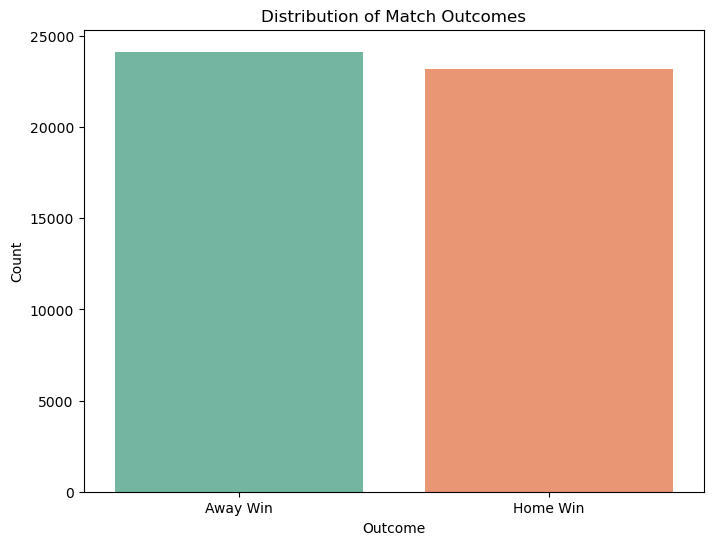

In [36]:

outcomes = results['home_team_won'].value_counts().rename({True: 'Home Win', False: 'Away Win', None: 'Draw'})

plt.figure(figsize=(8, 6))
sns.countplot(data=results, x='home_team_won', palette='Set2')
plt.title('Distribution of Match Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['Away Win', 'Home Win'])
plt.show()

# Distribution of goals scored by the home and away teams

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


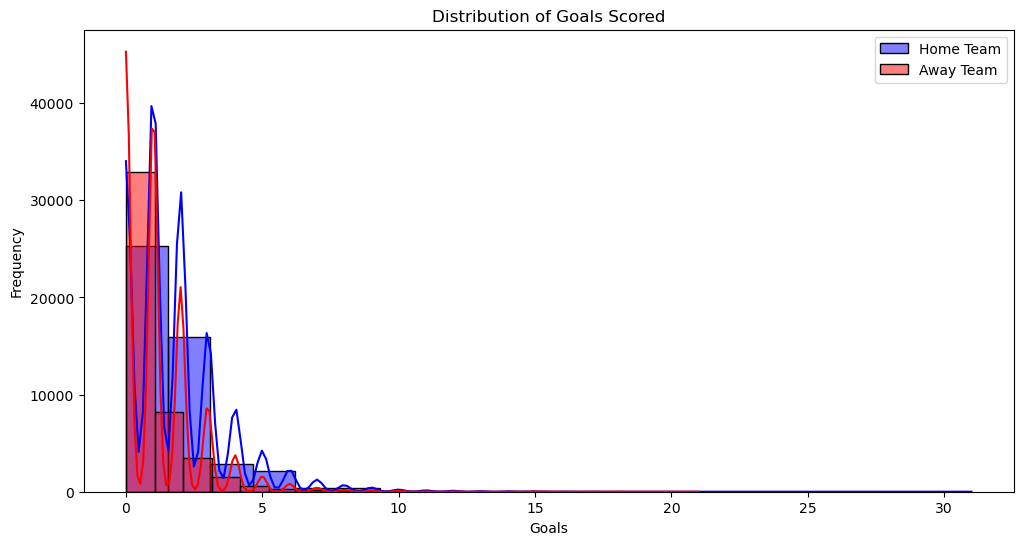

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(results['home_score'], bins=20, kde=True, color='blue', label='Home Team')
sns.histplot(results['away_score'], bins=20, kde=True, color='red', label='Away Team')
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Top goal scorers

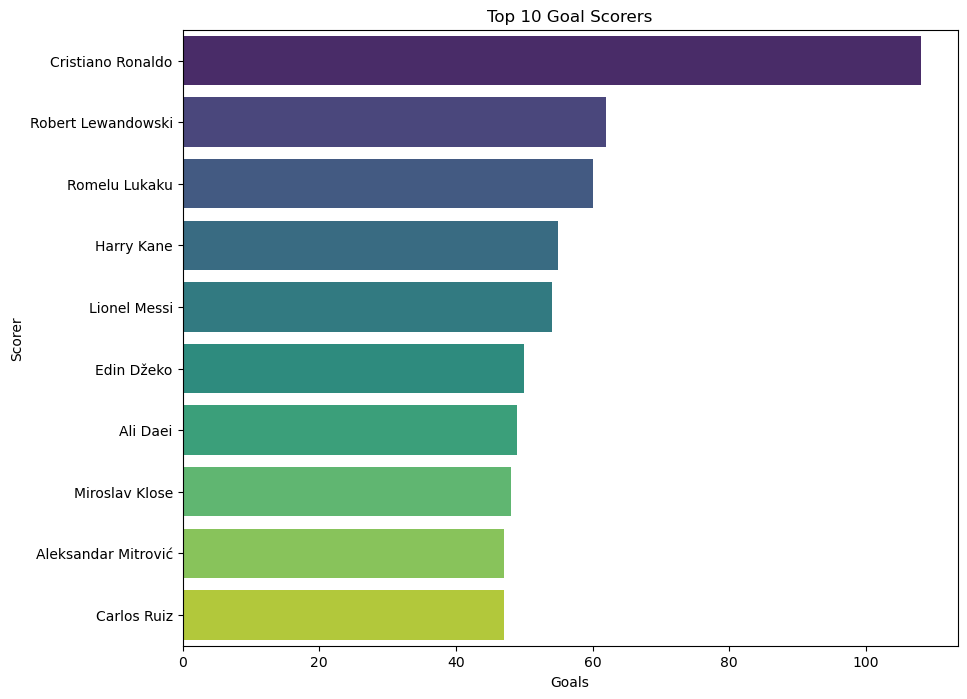

In [38]:
top_scorers = goalscorers['scorer'].value_counts().head(10)

plt.figure(figsize=(10, 8))
sns.barplot(y=top_scorers.index, x=top_scorers.values, palette='viridis')
plt.title('Top 10 Goal Scorers')
plt.xlabel('Goals')
plt.ylabel('Scorer')
plt.show()

# Distribution of penalties and own goals

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


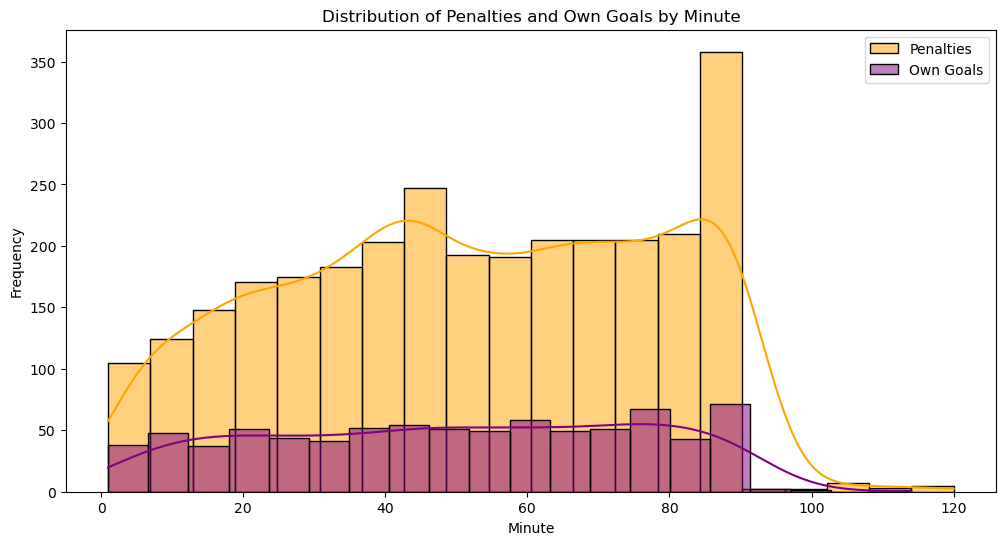

In [39]:
penalties = goalscorers[goalscorers['penalty'] == True]
own_goals = goalscorers[goalscorers['own_goal'] == True]

plt.figure(figsize=(12, 6))
sns.histplot(penalties['minute'], bins=20, kde=True, color='orange', label='Penalties')
sns.histplot(own_goals['minute'], bins=20, kde=True, color='purple', label='Own Goals')
plt.title('Distribution of Penalties and Own Goals by Minute')
plt.xlabel('Minute')
plt.ylabel('Frequency')
plt.legend()
plt.show()



# Home and Away Team Win Rates

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(results['home_team_win_rate'], bins=30, kde=True, color='blue', label='Home Team Win Rate')
sns.histplot(results['away_team_win_rate'], bins=30, kde=True, color='red', label='Away Team Win Rate')
plt.title('Distribution of Home and Away Team Win Rates')
plt.xlabel('Win Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()


KeyError: 'home_team_win_rate'

<Figure size 1000x600 with 0 Axes>

# Goal Distributions

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


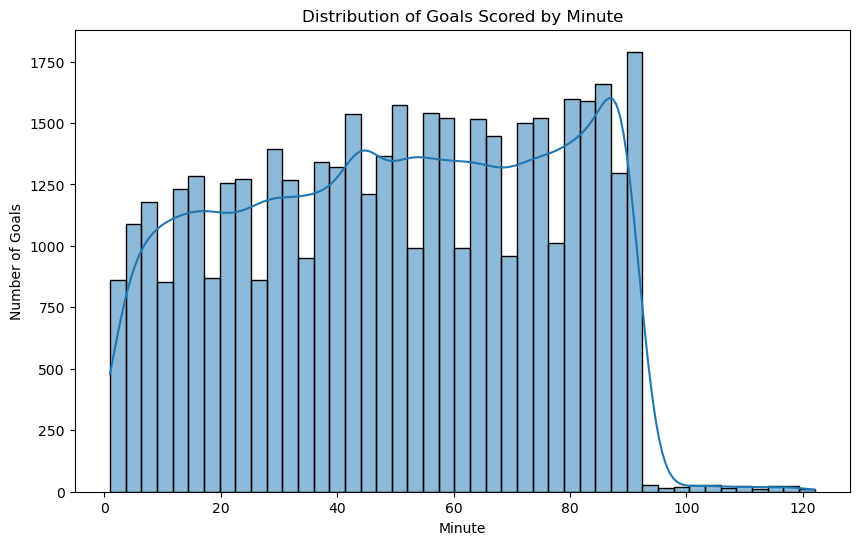

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(goalscorers['minute'], bins=45, kde=True)
plt.title('Distribution of Goals Scored by Minute')
plt.xlabel('Minute')
plt.ylabel('Number of Goals')
plt.show()


In [44]:

# Aggregate the number of goals by tournament
goals_by_tournament = results.groupby('tournament').size().reset_index(name='goal_count')

# Sort the tournaments by the number of goals
goals_by_tournament = results.sort_values(by='goal_count', ascending=False)

# Plot the number of goals by tournament
plt.figure(figsize=(15, 8))
plt.barh(goals_by_tournament['tournament'], goals_by_tournament['goal_count'], color='skyblue')
plt.xlabel('Number of Goals')
plt.ylabel('Tournament')
plt.title('Number of Goals by Tournament')
plt.gca().invert_yaxis()
plt.show()


KeyError: 'goal_count'